## Importing Dependencies

In [1]:
# 1. Data Manipulation
import numpy as np
import pandas as pd

# 2. Data Vizualisation
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


# 3. Algorithms
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC


# 4. Metrics
from sklearn import metrics, model_selection

# 5. Feature Encoding
from sklearn.preprocessing import LabelEncoder

# 6. Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

%matplotlib inline
style.use('dark_background')

## Loading Data

In [2]:
finance_train = pd.read_csv("finance_train_data.csv")
#to-do : add dtype={'columns':'datatype'} will change the datatypes of features while reading the file itself.
finance_train_copy = finance_train.copy()
finance_test = pd.read_csv("finance_test_data.csv")

# View the training data
finance_train.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Variables Description


<pre>
Loan_ID	            : Unique Loan ID
Gender	             : Applicant is Male/Female
Married	            : Applicant married - Yes/No
Dependents             : Number of dependents
Education              : Applicant Education - Graduate/ Under Graduate
Self_Employed          : Self employed - Yes/No
ApplicantIncome        : Applicants total income
CoapplicantIncome      : Coapplicants total income
LoanAmount	         : Loan amount
Loan_Amount_Term       : Term of loan in months
Credit_History	     : Credit history meets guidelines - 1(Yes)/ 0(No)
Property_Area	      : Urban/ Semi Urban/ Rural
Loan_Status	        : Loan approved - Yes/No
</pre>

In [3]:
# function to get all relevant information about the dataframe

def get_df_info(df, include_unique=True):
    column = [col for col in df.columns]
    column_type = [type(cell) for cell in df.loc[0,:]]
    null_count = [df[col].isna().sum() for col in df.columns]
    null_percent = [((df[col].isna().sum()/df.shape[0])*100) for col in df.columns]
    if include_unique:
        unique = [df[col].unique() for col in df.columns]
        unique_count = [df[col].nunique() for col in df.columns]
        df_info = pd.DataFrame({'column': column, 'column_type': column_type,
                                'null_count': null_count, 'unique_count': unique_count,
                                'null_percent': null_percent, 'unique_values': unique})
    else:
        df_info = pd.DataFrame({'column': column, 'column_type': column_type,
                                'null_count': null_count, 'null_percent': null_percent})
        
    return df_info
    

get_df_info(finance_train)

,column,column_type,null_count,unique_count,null_percent,unique_values
0,Loan_ID,<class 'str'>,0,614,0.000000,"[LP001002, LP001003, LP001005, LP001006, LP001..."
1,Gender,<class 'str'>,13,2,2.117264,"[Male, Female, nan]"
2,Married,<class 'str'>,3,2,0.488599,"[No, Yes, nan]"
3,Dependents,<class 'str'>,15,4,2.442997,"[0, 1, 2, 3+, nan]"
4,Education,<class 'str'>,0,2,0.000000,"[Graduate, Not Graduate]"
5,Self_Employed,<class 'str'>,32,2,5.211726,"[No, Yes, nan]"
6,ApplicantIncome,<class 'numpy.int64'>,0,505,0.000000,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303..."
7,CoapplicantIncome,<class 'numpy.float64'>,0,287,0.000000,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ..."
8,LoanAmount,<class 'numpy.float64'>,22,203,3.583062,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ..."
9,Loan_Amount_Term,<class 'numpy.float64'>,14,10,2.280130,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,..."


## What and where are the holes in out data? Visualising missing values.

<AxesSubplot:>

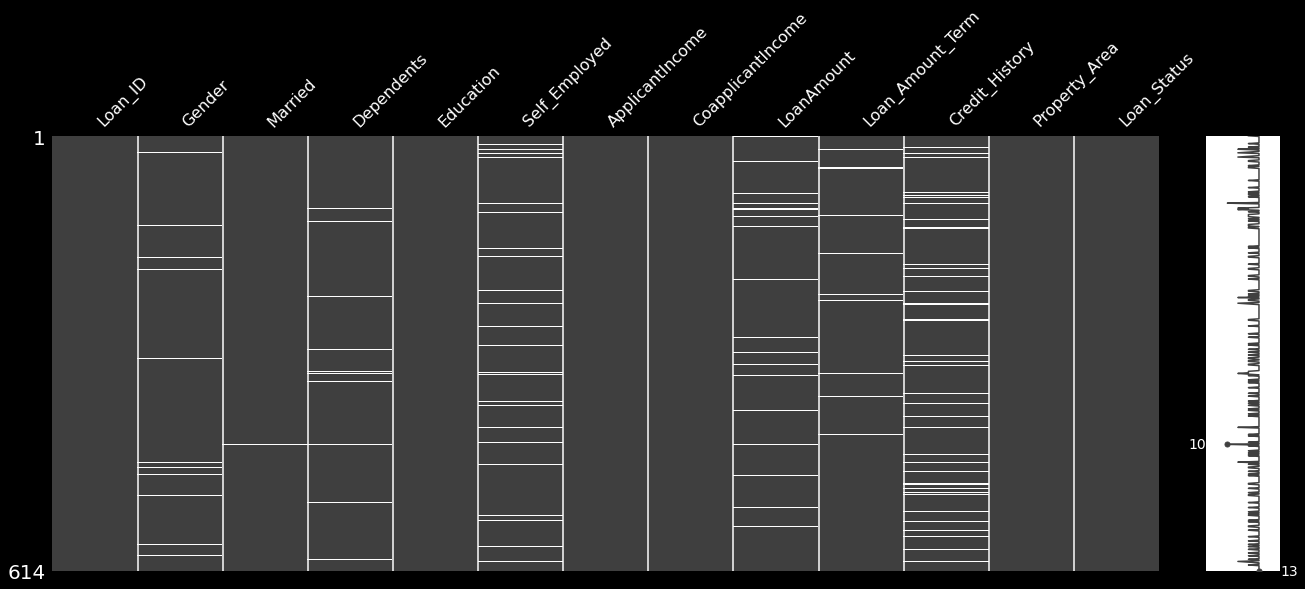

In [4]:
missingno.matrix(finance_train, figsize=(22,8))

#### Clearly, we have a lot of missing values in multiple columns. Knowing this information, we need to figure out a way to process all the missing values.

In [5]:
# Arranging columns by proportion of null values
get_df_info(finance_train).sort_values(by='null_percent').loc[:, ['column', 'null_count', 'null_percent']]

,column,null_count,null_percent
0,Loan_ID,0,0.000000
4,Education,0,0.000000
6,ApplicantIncome,0,0.000000
7,CoapplicantIncome,0,0.000000
11,Property_Area,0,0.000000
12,Loan_Status,0,0.000000
2,Married,3,0.488599
1,Gender,13,2.117264
9,Loan_Amount_Term,14,2.280130
3,Dependents,15,2.442997


#### Therefore, we can see that Self_Employed and Credit_History contain the highest percentage of missing values.


#### <u>Innovation-1:</u> **Can we find all the rows that have at least two feature values as null?**

In [6]:
# Extracting the null indices of each feature

m = finance_train[finance_train.Married.isna()].index.to_list()
g = finance_train[finance_train.Gender.isna()].index.to_list()
lat = finance_train[finance_train.Loan_Amount_Term.isna()].index.to_list()
d = finance_train[finance_train.Dependents.isna()].index.to_list()
la = finance_train[finance_train.LoanAmount.isna()].index.to_list()
se = finance_train[finance_train.Self_Employed.isna()].index.to_list()
ch = finance_train[finance_train.Credit_History.isna()].index.to_list()

list_null_index = [m, g, lat, d, la, se, ch]

# To check if a row with all null values exists
print(set(m) & set(g) & set(la) & set(lat) & set(d) & set(se) & set(ch))

set()


In [7]:
# Trying to find the existence of all the rows with at least two missing values.

miss_index = []

for i in list_null_index:
    for j in list_null_index:
        if i !=j:
            x = set(i) & set(j)
            if len(x) != 0:
                if x not in list_null_index:              # Memoization
                    miss_index.append(x)
                else:
                    continue
print(list(miss_index))

[{104, 435, 228}, {435}, {460}, {335}, {19}, {104, 435, 228}, {335}, {435, 102}, {435}, {435, 102}, {95}, {95}, {19}, {95}, {600, 236, 24, 411, 30, 95}, {460}, {95}, {600, 236, 24, 411, 30, 95}]


In [8]:
# Extracting the unique indices form the list of sets.

indices_remove = []

for i in miss_index:
    for j in i:
        if j not in indices_remove:
            indices_remove.append(j)
        else:
            continue
            
# Let's look at the indices that from the dataframe that contain at least two missing values.
indices_remove

[104, 435, 228, 460, 335, 19, 102, 95, 600, 236, 24, 411, 30]

In [9]:
# Printing the rows from the DataFrame with at least 2 missing values.

print(len(indices_remove))
finance_train.iloc[indices_remove,:]

13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
236,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N


#### This indicates that there are 13 rows with at least 2 null values in the features. Our best bet would be to drop these rows and then we can worry about Imputing the rest of the data.

In [10]:
# Dropping the calculated indices

finance_train = finance_train.drop(index=indices_remove)
finance_train.reset_index(drop=True, inplace=True)
finance_train.shape

(601, 13)

In [11]:
finance_train.shape[0] + len(indices_remove) == 614  #Checking if sum of removed & left is equal to the original

True

In [12]:
# Checking the missing values again.
get_df_info(finance_train).sort_values(by='null_percent', ascending=False).loc[:, ['column', 'null_count', 'null_percent']]

,column,null_count,null_percent
10,Credit_History,43,7.154742
5,Self_Employed,25,4.159734
8,LoanAmount,19,3.161398
1,Gender,12,1.996672
9,Loan_Amount_Term,12,1.996672
3,Dependents,10,1.663894
0,Loan_ID,0,0.000000
2,Married,0,0.000000
4,Education,0,0.000000
6,ApplicantIncome,0,0.000000


### To perform our Data Analysis, let's create an empty DataFrame to which we will keep adding the features one by one.

In [13]:
df_finance = pd.DataFrame()

## Let's explore each feature individually


In [14]:
# Function to make distribution and count plots

def plot_(data, col, figsize=(20,2), hue=False):
    if hue:
        sns.displot(x=col, data=data, hue='Loan_Status', height=8)
    else:
        plt.figure(figsize=figsize)
        sns.countplot(y=col, data=data)

In [15]:
#Function to calculate the proportion of "Yes" values for features with binary output against Loan_status

def feature_approval_proportion(df, col, yes=1, no=0, label='Loan_Status'):
    
    yes_count, no_count = df[col].value_counts()[yes], df[col].value_counts()[no]

    yes_prop = (df[df[label] == 1][col] == yes).sum()/ yes_count
    no_prop = (df[df[label] == 1][col] == no).sum()/ no_count

    return yes_prop*100, no_prop*100 

## Target Feature: Loan_Status (whether the loan was approved or not)
   **This is what we want out model to predict.**

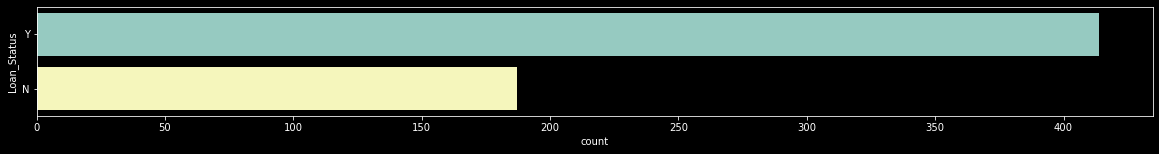

In [16]:
plot_(data=finance_train, col='Loan_Status')

In [17]:
# Let's encode 1 for Loan Approved, 0 for not approved and add this feature to out new dataframe

df_finance['Loan_Status'] = finance_train['Loan_Status']
df_finance['Loan_Status'] = np.where(df_finance['Loan_Status'] == 'Y', 1, 0)

## Feature-1: Loan_ID

We have 601 unique values for this feature indicating that there is no underlying pattern behind its occurence and hence we do not add it to out new DataFrame

## Feature-2: Married (Y/N)

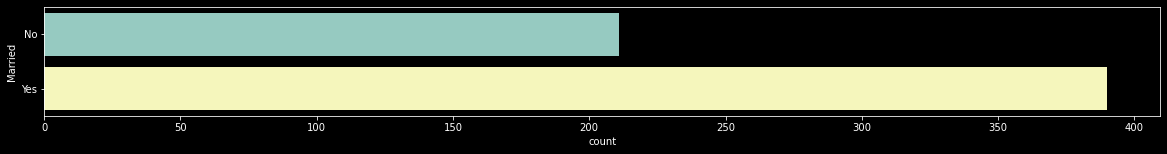

In [18]:
# Let's look at the distribution of Married

plot_(finance_train, col='Married')

 Married does not have any missing values. Therefore, let's encode 1 if an individual is married, 0 otherwise and add it to out new DataFrame

In [19]:
df_finance['Married'] = finance_train['Married']
df_finance['Married'] = np.where(df_finance['Married'] == 'Yes', 1, 0)
df_finance.head()

,Loan_Status,Married
0,1,0
1,0,1
2,1,1
3,1,1
4,1,0


 How does the Marital Status look when compared to Loan_Status ?

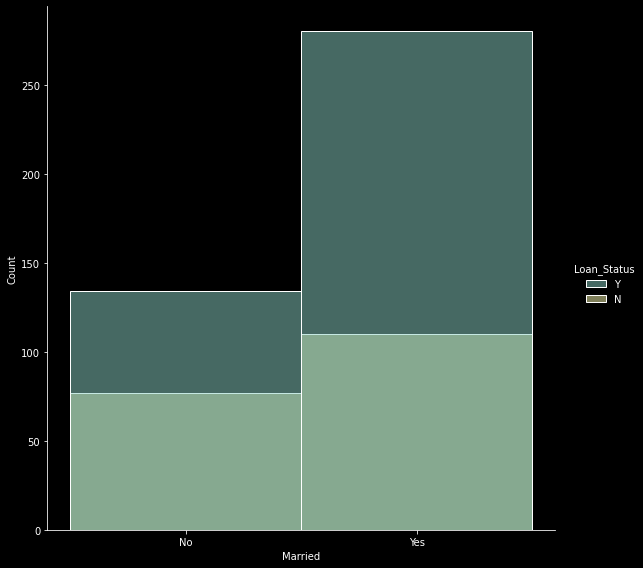

In [20]:
plot_(data=finance_train, col='Married', hue=True)

From the plot, it looks like, Married individual is more likely to get approved. Let's verify this numerically. We will use the function that we created above.

In [21]:
#Percent of married and unmarried whose status was YES

marr, unmarr = feature_approval_proportion(df_finance, col='Married')

print("{}% married and {}% unmarried got approved".format(marr, unmarr))

71.7948717948718% married and 63.507109004739334% unmarried got approved


#### **Hence, our hypothesis that a married individual is more likely to get approved seems correct.**

## Feature-3: Education (Graduate/Not Graduate)

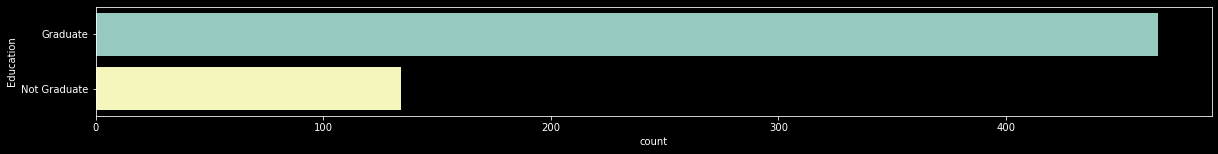

In [22]:
# Distribution of Married

plot_(finance_train, col='Education')

Education has 0 missing values. Encoding 1 for Graduate, 0 for Not Graduate and adding it to our new DataFrame.

In [23]:
df_finance['Graduate'] = finance_train['Education']
df_finance['Graduate'] = np.where(df_finance['Graduate'] == 'Graduate', 1, 0)
df_finance.head()

,Loan_Status,Married,Graduate
0,1,0,1
1,0,1,1
2,1,1,1
3,1,1,0
4,1,0,1


## Feature-4: Property_Area

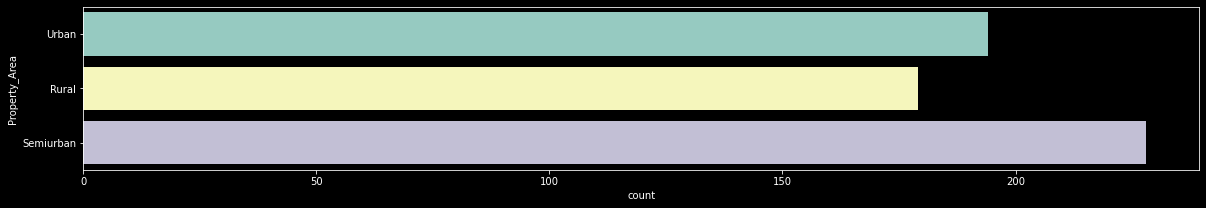

In [24]:
plot_(data=finance_train, col='Property_Area', hue=False, figsize=(20,3))

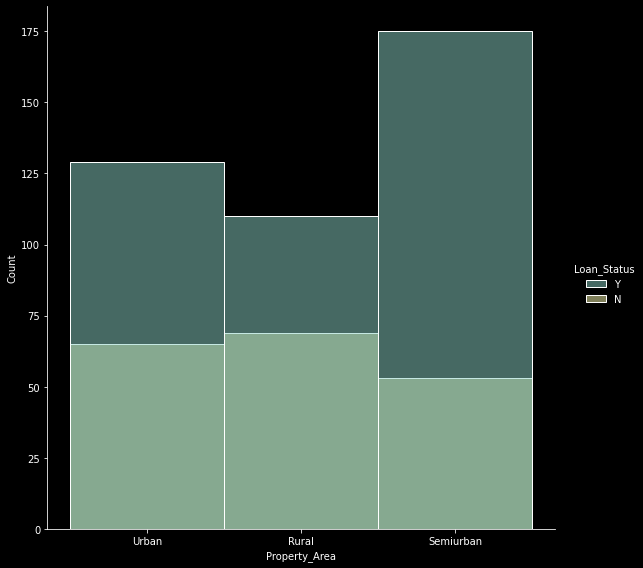

In [25]:
plot_(data=finance_train, col='Property_Area', hue=True, figsize=(20,3))

#### From the above graph, we observe that people from Semiurban area have a greater chance of Loan_approval. Therefore, while encoding Property_Area into numbers, we can give the most weight to Semiurban.

In [26]:
# Encoding 1 for Rural, 2 for Urban and 3 for Semiurban and adding it to the new DataFrame

df_finance['Property_Area'] = finance_train['Property_Area'].replace({'Semiurban': 3,
                                                                     'Urban': 2,
                                                                     'Rural': 1})
df_finance.head()

,Loan_Status,Married,Graduate,Property_Area
0,1,0,1,2
1,0,1,1,1
2,1,1,1,2
3,1,1,0,2
4,1,0,1,2


## Feature-5: ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

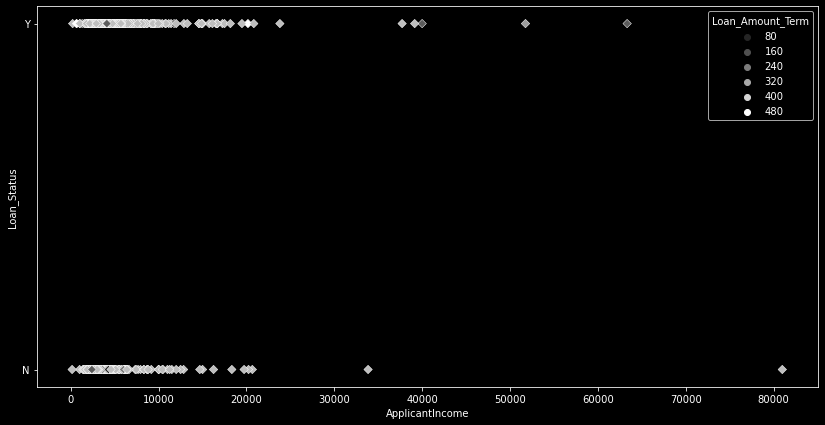

In [27]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='ApplicantIncome', y='Loan_Status', data=finance_train, hue='Loan_Amount_Term', palette='gray', marker="D")

<AxesSubplot:ylabel='Frequency'>

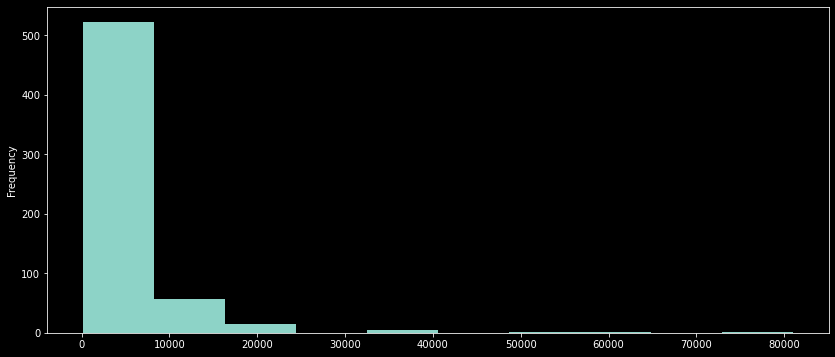

In [28]:
finance_train.ApplicantIncome.plot(kind='hist', figsize=(14,6))

Applicant Income is skewed towards the right (+vely)

In [29]:
finance_train.ApplicantIncome.describe()

count      601.000000
mean      5404.632280
std       6155.485943
min        150.000000
25%       2876.000000
50%       3775.000000
75%       5780.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

#### 75% of the Applicants have an income <5780. The maximum income is 81000 indicating a possibility of outliers with respect to the Loan_Status. Therefore, we can discretize the ApplicantIncome by dividing it into 5 categories where Category 1 is the lowest income group and Category 5 is the highest income group.

In [30]:
# Discretizing the Applicant_Income into 5 categories and adding it to our new DataFrame

df_finance['Applicant_Income_Category'] = pd.qcut(finance_train.ApplicantIncome, 5, labels=[1,2,3,4,5])
df_finance.head()

,Loan_Status,Married,Graduate,Property_Area,Applicant_Income_Category
0,1,0,1,2,4
1,0,1,1,1,4
2,1,1,1,2,2
3,1,1,0,2,1
4,1,0,1,2,4


## Feature-6: CoapplicantIncome

We have a lot of unique values for CoapplicantIncome. Let's try to see the impact on Loan_Status

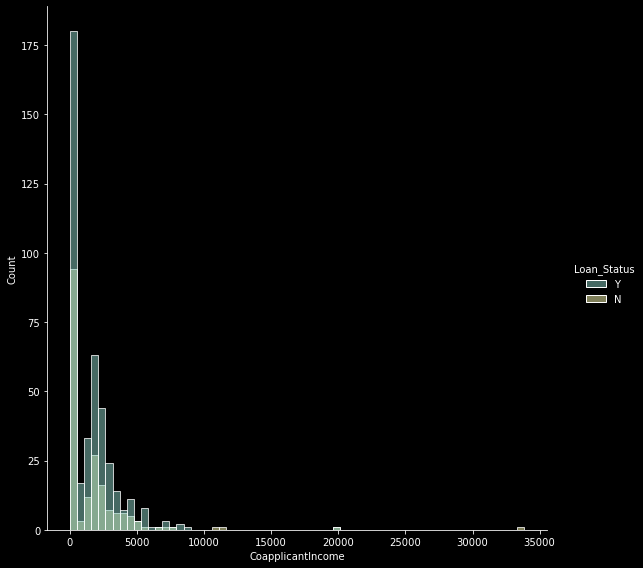

In [31]:
plot_(data=finance_train, col='CoapplicantIncome', figsize=(25,15), hue=True)

In [32]:
finance_train.CoapplicantIncome.value_counts(normalize=True).head(10)

0.0       0.444260
1666.0    0.008319
2083.0    0.008319
2500.0    0.008319
1750.0    0.004992
2333.0    0.004992
1625.0    0.004992
5625.0    0.004992
1800.0    0.004992
1459.0    0.004992
Name: CoapplicantIncome, dtype: float64

#### 44% of the values in CoapplicantIncome are 0. Let's dig deep to see if there's any significant difference between 0 and non-zero CoapplicantIncome

In [33]:
# Proportion of Approved when CoapplicantIncome is 0
print(" Coapplicant Income is zero:   ", end="   ")

coapp_zero = finance_train[finance_train.CoapplicantIncome == 0].shape[0]            # number of rows with 0 copp income
print(finance_train[(finance_train['CoapplicantIncome'] == 0) & (finance_train['Loan_Status'] == 'Y')].shape[0] / coapp_zero) 


# Proportion of Approved when CoapplicantIncome is non-zero
print(" Coapplicant Income is non-zero: ", end=" ")

coapp_non_zero = finance_train[finance_train.CoapplicantIncome != 0].shape[0]        # number of rows with non-zero coapp income
print(finance_train[(finance_train['CoapplicantIncome'] != 0) & (finance_train['Loan_Status'] == 'Y')].shape[0] / coapp_non_zero)

 Coapplicant Income is zero:      0.6479400749063671
 Coapplicant Income is non-zero:  0.7215568862275449


#### There does seem to be a higher proportion of people who get approval if their Coapplicant's Income is non-zero. Is there a relation between higher Coapplicant Income and Loan_Status? Let's check.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

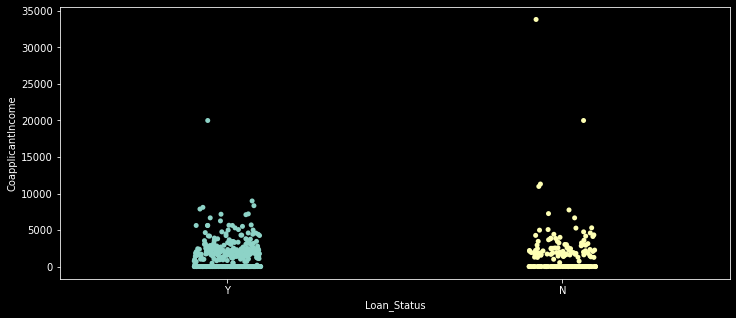

In [34]:
plt.figure(figsize=(12,5))
sns.stripplot(y='CoapplicantIncome', x='Loan_Status', data=finance_train)

#### <u>Feature_Engineering</u> : There doesn't seem to be much increase in the probability of Loan getting approved as the CoapplicantIncome increases. Therefore, we create a new feature which is 1 if CoapplicantIncome is non-zero, 0 otherwise.

In [35]:
df_finance['Coapplicant_Income_exists'] = finance_train['CoapplicantIncome']
df_finance['Coapplicant_Income_exists'] = np.where(df_finance.Coapplicant_Income_exists == 0, 0, 1)
df_finance.head()

,Loan_Status,Married,Graduate,Property_Area,Applicant_Income_Category,Coapplicant_Income_exists
0,1,0,1,2,4,0
1,0,1,1,1,4,1
2,1,1,1,2,2,0
3,1,1,0,2,1,1
4,1,0,1,2,4,0


## Feature-7: Gender

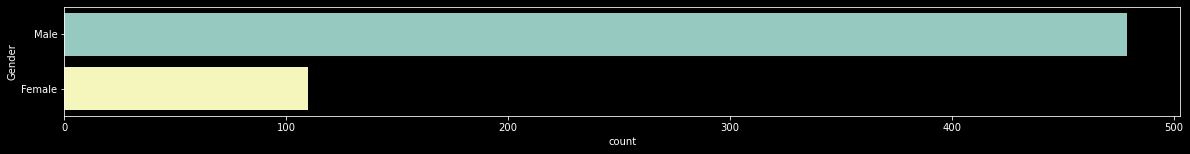

In [36]:
plot_(data=finance_train, hue=False, col='Gender')

In [37]:
finance_train.Gender.value_counts(dropna=False)

Male      479
Female    110
NaN        12
Name: Gender, dtype: int64

#### About 80% of applicants are Males. Therefore, we will try to keep approximately the same ratio while filling the missing values.

In [38]:
np.random.seed(23)
finance_train.Gender = finance_train.Gender.fillna(pd.Series(np.random.choice(['Male', 'Female'], p=[0.8,0.2], size=len(finance_train))))
finance_train.Gender.value_counts(dropna=False)

Male      488
Female    113
Name: Gender, dtype: int64

In [39]:
# Encoding 1 for Males, 0 for Females and adding it to our new DataFrame

df_finance['Male'] = finance_train['Gender']
df_finance['Male'] = np.where(df_finance['Male'] == 'Male', 1, 0)
df_finance.head(6)

,Loan_Status,Married,Graduate,Property_Area,Applicant_Income_Category,Coapplicant_Income_exists,Male
0,1,0,1,2,4,0,1
1,0,1,1,1,4,1,1
2,1,1,1,2,2,0,1
3,1,1,0,2,1,1,1
4,1,0,1,2,4,0,1
5,1,1,1,2,4,1,1


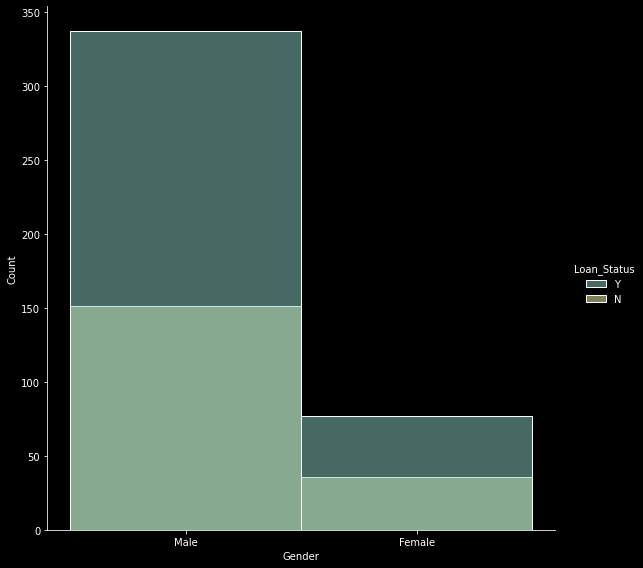

In [40]:
plot_(data=finance_train, col='Gender', hue=True, figsize=(10,8))

#### Looks like almost same proportion of Male, Females get approved. Let's check.

In [41]:
male_approve, female_approve = feature_approval_proportion(df_finance, col='Male')
print("Males approved: {} %\nFemales  approved: {} %".format(male_approve, female_approve))

Males approved: 69.05737704918032 %
Females  approved: 68.14159292035397 %


**Therefore, Loan_Status is not very dependent on Gender. 'Advantage:' Even if the actual null values are in a different proportion from what we imputed it wouldn't make much of a difference.**

## Feature-8 : Dependents

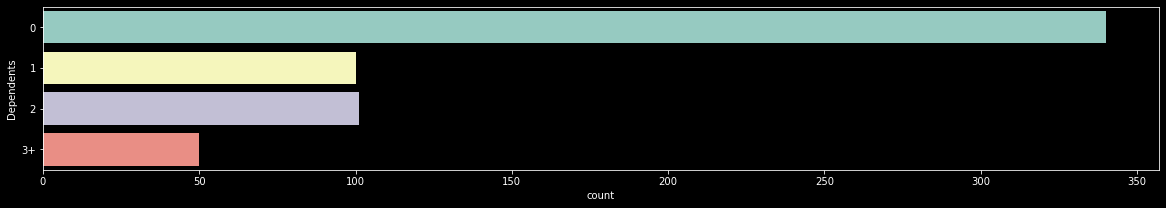

In [42]:
plot_(finance_train, col='Dependents', figsize=(20,3), hue=False)

In [43]:
finance_train.Dependents = finance_train.Dependents.replace('3+','3')
finance_train.Dependents.value_counts(dropna=False)

0      340
2      101
1      100
3       50
NaN     10
Name: Dependents, dtype: int64

#### Imputing the missing values with 0,1,2 and 3 in the same proportion as they occur in the rest of the data.

In [44]:
np.random.seed(23)
finance_train.Dependents = finance_train.Dependents.fillna(pd.Series(np.random.choice(['0', '1', '2', '3'], p=[0.58, 0.17, 0.17, 0.08], size=len(finance_train))))
finance_train.Dependents.value_counts()

0    345
1    102
2    102
3     52
Name: Dependents, dtype: int64

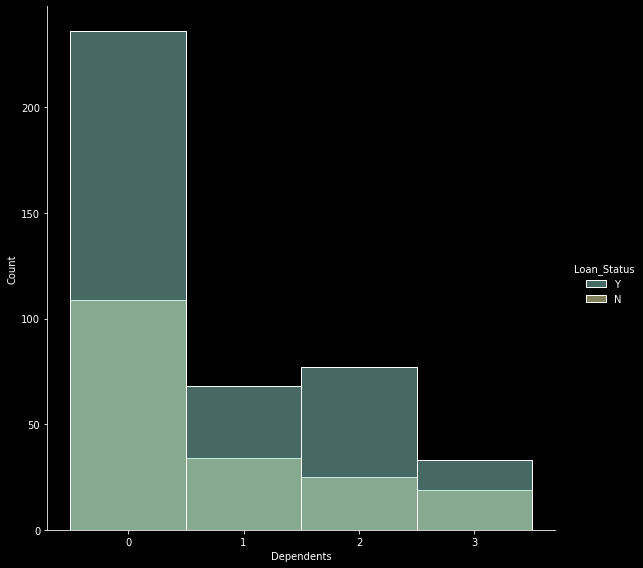

In [45]:
plot_(finance_train, col='Dependents', hue=True)

#### Individuals having 3 or more Dependents have the least chance of getting their loans approved. Let's print the actual numbers.

In [46]:
zero, two  = finance_train.Dependents.value_counts()[0], finance_train.Dependents.value_counts()[1]
one, three = finance_train.Dependents.value_counts()[2], finance_train.Dependents.value_counts()[3]

zero_p = (finance_train[(finance_train.Dependents == '0')]['Loan_Status'] == 'Y').sum() / zero
two_p = (finance_train[(finance_train.Dependents == '1')]['Loan_Status'] == 'Y').sum() / two
one_p = (finance_train[(finance_train.Dependents == '2')]['Loan_Status'] == 'Y').sum() / one
three_p = (finance_train[(finance_train.Dependents == '3')]['Loan_Status'] == 'Y').sum() / three

print("zero dependents approved:  {}\nOne dependent approved:    {}\nTwo Dependents approved:   {}\nThree dependents approved: {}".format(zero_p, one_p, two_p, three_p))

zero dependents approved:  0.6840579710144927
One dependent approved:    0.7549019607843137
Two Dependents approved:   0.6666666666666666
Three dependents approved: 0.6346153846153846


##### Therefore, we need to encode the Dependents accordingly giving most weight to 1 dependent followed by 0, 2 and 3.

In [47]:
df_finance['Dependents'] = finance_train['Dependents']
df_finance['Dependents'] = df_finance.Dependents.replace({'1': 3, '0': 2, '2': 1, '3': 0})
df_finance.head()

,Loan_Status,Married,Graduate,Property_Area,Applicant_Income_Category,Coapplicant_Income_exists,Male,Dependents
0,1,0,1,2,4,0,1,2
1,0,1,1,1,4,1,1,3
2,1,1,1,2,2,0,1,2
3,1,1,0,2,1,1,1,2
4,1,0,1,2,4,0,1,2


## Feature-9 : Loan_Amount_Term

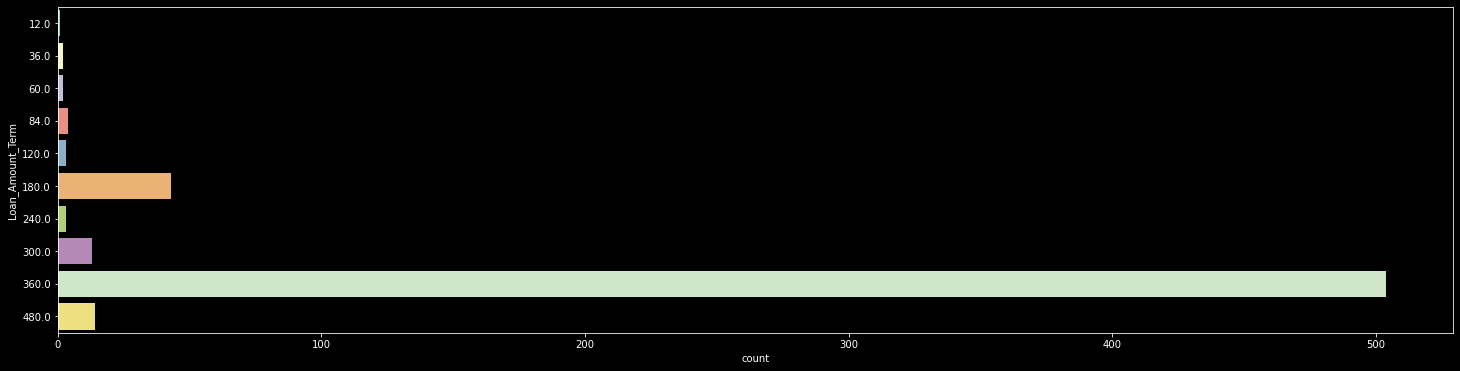

In [48]:
plot_(finance_train, col='Loan_Amount_Term', figsize=(25,6),hue=False)

In [49]:
finance_train.Loan_Amount_Term.value_counts(normalize=True, dropna=False)

360.0    0.838602
180.0    0.071547
480.0    0.023295
300.0    0.021631
NaN      0.019967
84.0     0.006656
240.0    0.004992
120.0    0.004992
36.0     0.003328
60.0     0.003328
12.0     0.001664
Name: Loan_Amount_Term, dtype: float64

#### The Loan_Amount_Term column is highly skewed towards 360.0. We can choose 360.0 and 180.0 to impute the missing values in proportions of 0.84, 0.16

In [50]:
np.random.seed(23)
finance_train['Loan_Amount_Term'] = finance_train.Loan_Amount_Term.fillna(pd.Series(np.random.choice([360.0, 180.0], p=[0.84, 0.16], size=len(finance_train))))

#### Converting the term from months into years.

In [51]:
finance_train['Loan_Term_Years'] = finance_train['Loan_Amount_Term'].apply(lambda x: x//12)
finance_train.Loan_Term_Years.value_counts()

30.0    515
15.0     44
40.0     14
25.0     13
7.0       4
20.0      3
10.0      3
3.0       2
5.0       2
1.0       1
Name: Loan_Term_Years, dtype: int64

#### Let's check the impact of Loan term on the approval status.

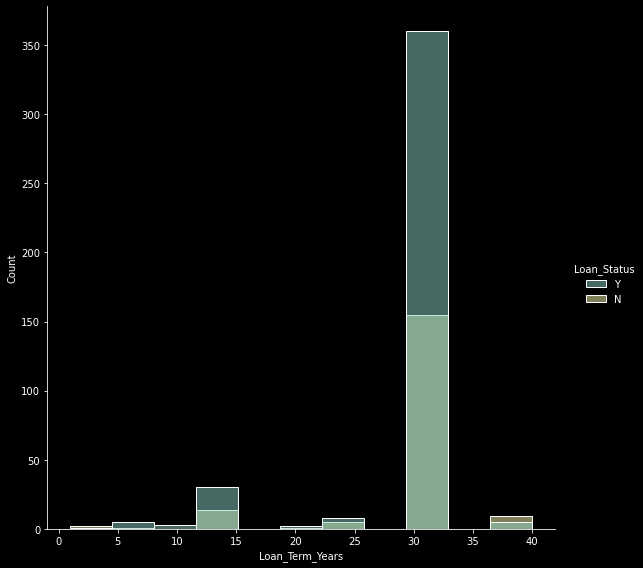

In [52]:
plot_(col='Loan_Term_Years', data=finance_train, hue='Loan_Status')

**In the top two bars, there is again no significant difference between the status of Loan approval.**

#### Label Encoding the Loan_Term

In [53]:
encode = LabelEncoder()
df_finance['Loan_Term_Years_encoded'] = pd.Series(encode.fit_transform(finance_train['Loan_Term_Years']))
df_finance.head(3)

,Loan_Status,Married,Graduate,Property_Area,Applicant_Income_Category,Coapplicant_Income_exists,Male,Dependents,Loan_Term_Years_encoded
0,1,0,1,2,4,0,1,2,8
1,0,1,1,1,4,1,1,3,8
2,1,1,1,2,2,0,1,2,8


## Feature-10 : LoanAmount

Loan_Amount is a continous feature and hence we make a scatterplot.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

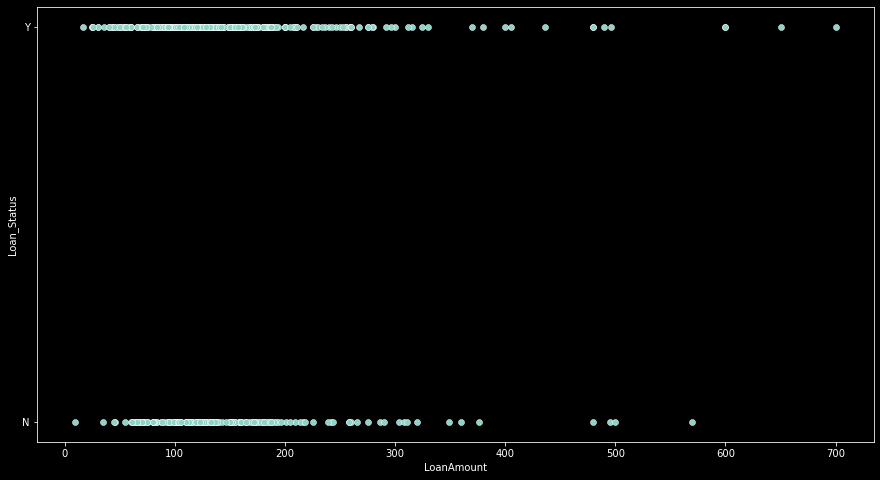

In [54]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LoanAmount', y='Loan_Status', data=finance_train)

In [55]:
finance_train.LoanAmount.describe()

count    582.000000
mean     145.869416
std       85.681053
min        9.000000
25%      100.000000
50%      127.000000
75%      167.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [56]:
finance_train.LoanAmount.value_counts(dropna=False)

120.0    20
NaN      19
110.0    17
100.0    15
187.0    12
         ..
360.0     1
53.0      1
65.0      1
156.0     1
89.0      1
Name: LoanAmount, Length: 203, dtype: int64

<AxesSubplot:ylabel='Frequency'>

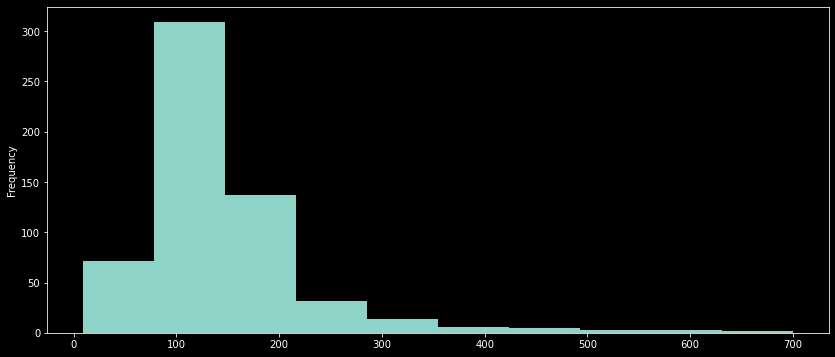

In [57]:
finance_train.LoanAmount.plot(kind='hist', figsize=(14,6))

The distribution of LoanAmount has got a long tail. Therefore, we can replace the missing values with the median of the distribution.

In [58]:
finance_train.LoanAmount.fillna(finance_train.LoanAmount.median(), inplace=True)
finance_train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Term_Years
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y,30.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,30.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,30.0


#### Because of the possible existence of outliers, we will also discretize the Loan Amount and cut it into 5 categories.

In [59]:
df_finance['Loan_Amount'] = pd.qcut(finance_train.LoanAmount, 5, labels=[1,2,3,4,5])
df_finance.head(3)

,Loan_Status,Married,Graduate,Property_Area,Applicant_Income_Category,Coapplicant_Income_exists,Male,Dependents,Loan_Term_Years_encoded,Loan_Amount
0,1,0,1,2,4,0,1,2,8,3
1,0,1,1,1,4,1,1,3,8,3
2,1,1,1,2,2,0,1,2,8,1


## Feature-11 : Self_Employed


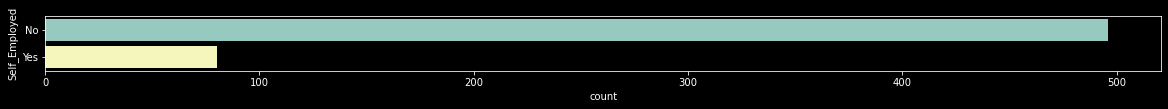

In [60]:
plot_(data=finance_train, col='Self_Employed', figsize=(20,1), hue=False)

In [61]:
finance_train.Self_Employed.value_counts(dropna=False)

No     496
Yes     80
NaN     25
Name: Self_Employed, dtype: int64

In [62]:
finance_train.Self_Employed.value_counts(normalize=True)

No     0.861111
Yes    0.138889
Name: Self_Employed, dtype: float64

#### Self_Employed has 25 missing values. Let's impute them in the same proportions as seen in the available data

In [63]:
np.random.seed(23)
finance_train['Self_Employed'] = finance_train.Self_Employed.fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.14, 0.86], size=len(finance_train))))
finance_train.Self_Employed.value_counts(dropna=False)

No     516
Yes     85
Name: Self_Employed, dtype: int64

#### Visualising the impact of Self_Employed on Loan_status

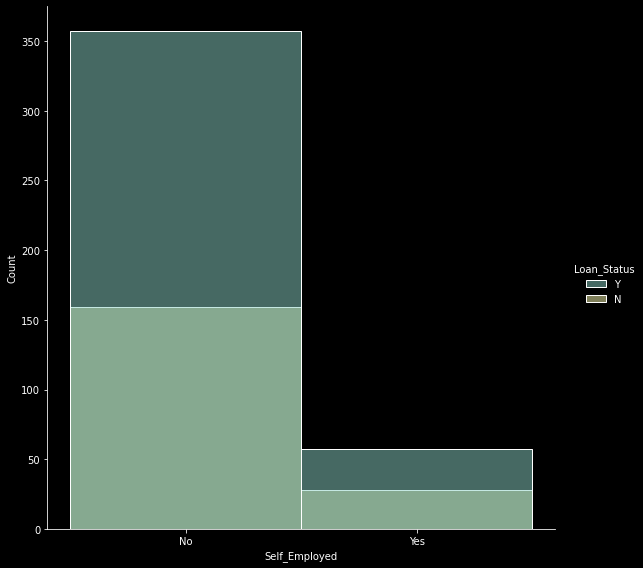

In [64]:
plot_(data=finance_train, col='Self_Employed', hue=True)

In [65]:
# Adding Self_Employed to our new DataFrame after encoding 1 for "YES" and 0 for "NO"

df_finance['Self_Employed'] = finance_train['Self_Employed']
df_finance['Self_Employed'] = np.where(df_finance.Self_Employed == 'Yes', 1, 0)
df_finance.head(6)

,Loan_Status,Married,Graduate,Property_Area,Applicant_Income_Category,Coapplicant_Income_exists,Male,Dependents,Loan_Term_Years_encoded,Loan_Amount,Self_Employed
0,1,0,1,2,4,0,1,2,8,3,0
1,0,1,1,1,4,1,1,3,8,3,0
2,1,1,1,2,2,0,1,2,8,1,1
3,1,1,0,2,1,1,1,2,8,3,0
4,1,0,1,2,4,0,1,2,8,4,0
5,1,1,1,2,4,1,1,1,8,5,1


In [66]:
# Let's see the proportion of Self_employed people whose loan status was approved.

self_approve, not_self_approve = feature_approval_proportion(df_finance, col='Self_Employed')
print("{} % people who were Self-Employed were approved\n{} % people who were not Self-Employed were approved".format(self_approve, not_self_approve))

67.05882352941175 % people who were Self-Employed were approved
69.18604651162791 % people who were not Self-Employed were approved


Again, not much difference between the approval status depending on whether the person was self approved or not,

## Feature-12 : Credit_History


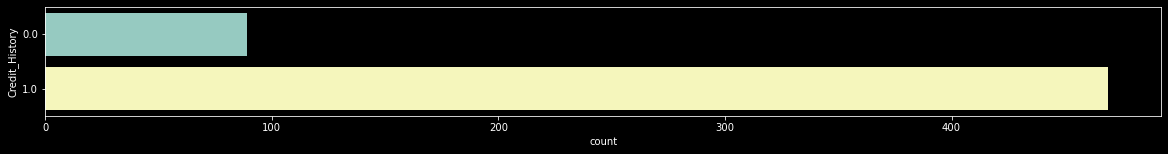

In [67]:
plot_(finance_train, col='Credit_History', hue=False)

In [68]:
finance_train.Credit_History.value_counts(dropna=False)

1.0    469
0.0     89
NaN     43
Name: Credit_History, dtype: int64

### Is credit History an important feauture to predict the Loan_Status?

Let's compute the correlation coefficient to get an idea of the importance of this feature after filling the missing values with both 0 and 1 one by one.

In [69]:
print("After filling with 0: ",np.corrcoef(finance_train.Credit_History.fillna(0), df_finance.Loan_Status)[0][1].round(4))

print("After filling with 1: ",np.corrcoef(finance_train.Credit_History.fillna(1), df_finance.Loan_Status)[0][1].round(4))

After filling with 0:  0.4248
After filling with 1:  0.5495


#### **From the correlation values we see that Credit_History has a big impact on Loan_Status and hence we will not make random allocations to fill the null values. Instead we will drop the rows altogether.**

In [70]:
df_finance['Credit_History'] = finance_train.Credit_History
df_finance.dropna(subset=['Credit_History'], inplace=True)

#Checking the null values one last time
df_finance.isna().sum()

Loan_Status                  0
Married                      0
Graduate                     0
Property_Area                0
Applicant_Income_Category    0
Coapplicant_Income_exists    0
Male                         0
Dependents                   0
Loan_Term_Years_encoded      0
Loan_Amount                  0
Self_Employed                0
Credit_History               0
dtype: int64

In [71]:
df_finance.dtypes      #Checking the data types to change later

Loan_Status                     int32
Married                         int32
Graduate                        int32
Property_Area                   int64
Applicant_Income_Category    category
Coapplicant_Income_exists       int32
Male                            int32
Dependents                      int64
Loan_Term_Years_encoded         int64
Loan_Amount                  category
Self_Employed                   int32
Credit_History                float64
dtype: object

#### **In total, we have removed 56 rows from the entire dataset which is about 9% of the total data. Let's try building our models and then we can come back to improve the imputations further and see if it improves our accuracy or not.**

## Start Building Machine Learning models.


#### Now that we have cleaned our data, we can start fitting various Machine Learning models to see which one performs the best. 

In [72]:
# CREATING A COPY OF THE DATAFRAME

df_finance_copy = df_finance.copy()

#Seperating the features and labels

df_finance_train = df_finance.drop('Loan_Status', axis=1)
label = df_finance['Loan_Status']

print(df_finance_train.shape, label.shape)

(558, 11) (558,)


### Evaluation parameters:  Accuracy(ACC), Balanced Accuracy(BAC), Recall(REC), Area Under Curve (AUC)

In [73]:
eval = {
'model_name': [],
'feature_count': [],
'features': [],
'ACC': [],
'BAC': [],
'REC': [],
'AUC': [],
}

In [74]:
# Function to create a DataFrame out of model evaluations 

def model_evaluation(model, fc, f, acc, bac, rec, auc):
    eval['model_name'].append(model)
    eval['feature_count'].append(fc)
    eval['features'].append(f)
    eval['ACC'].append(acc)
    eval['BAC'].append(bac)
    eval['REC'].append(rec)
    eval['AUC'].append(auc)
    
    df_eval = pd.DataFrame({'model_name': eval['model_name'],
                            'feature_count': eval['feature_count'],
                            'feature_names': eval['features'],
                            'ACC': eval['ACC'],
                            'BAC': eval['BAC'],
                            'REC': eval['REC'],
                            'AUC': eval['AUC'] 
                           })
    return df_eval.sort_values(by='BAC', ascending=False).round(3)

### Define a function to fit machine learning algorithms

We will be using the algorithms from the scikit-learn library, and almost all algorithms take similar inputs and produce similar outputs.

To prevent writing code multiple times, we will create a function that fits the model and returns the evaluation scores.

In [75]:
# sorted(metrics.SCORERS.keys())     -> cross-validation scoring measures

In [76]:
def fit_algo(algorithm, x_train, label, cv=10):
    
    # Cross-Validation prediction
    training_predictions = model_selection.cross_val_predict(algorithm,
                                                             x_train,
                                                             label,
                                                             cv=cv,
                                                             n_jobs=-1)
    
    # Evaluating necessary metrics
    acc = metrics.accuracy_score(label, training_predictions)
    bac = metrics.balanced_accuracy_score(label, training_predictions)
    rec = metrics.recall_score(label, training_predictions)
    auc = metrics.roc_auc_score(label, training_predictions)
    
    return acc, bac, rec, auc

In [77]:
feature_set_1 = df_finance_train.columns.tolist()         #Contains all the 11 features
feature_set_1

['Married',
 'Graduate',
 'Property_Area',
 'Applicant_Income_Category',
 'Coapplicant_Income_exists',
 'Male',
 'Dependents',
 'Loan_Term_Years_encoded',
 'Loan_Amount',
 'Self_Employed',
 'Credit_History']

## Gaussian NaiveBayes with feature_set_1

In [78]:
acc_nb_f1, bac_nb_f1, rec_nb_f1, auc_nb_f1 = fit_algo(GNB(), x_train=df_finance_train[feature_set_1], label=label)
model_evaluation('GNB_f1', len(feature_set_1), feature_set_1, acc_nb_f1, bac_nb_f1, rec_nb_f1, auc_nb_f1)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716


## Logistic Regression with feature_set_1

In [79]:
acc_lr_f1, bac_lr_f1, rec_lr_f1, auc_lr_f1 = fit_algo(LR(random_state=23, solver='liblinear'), df_finance_train[feature_set_1], label)
model_evaluation('LRC_f1', len(feature_set_1), feature_set_1, acc_lr_f1, bac_lr_f1, rec_lr_f1, auc_lr_f1)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716


## Random Forest Classifier with feature_set_1

In [80]:
acc_rf_f1, bac_rf_f1, rec_rf_f1, auc_rf_f1 = fit_algo(RFC(random_state=23), df_finance_train[feature_set_1], label)
model_evaluation('RFC_f1', len(feature_set_1), feature_set_1, acc_rf_f1, bac_rf_f1, rec_rf_f1, auc_rf_f1)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


## Support Vector Classifier feature_set_1

In [81]:
acc_svc_f1, bac_svc_f1, rec_svc_f1, auc_svc_f1 = fit_algo(SVC(random_state=23, kernel='linear'), df_finance_train[feature_set_1], label)
model_evaluation('SVC_f1', len(feature_set_1), feature_set_1, acc_svc_f1, bac_svc_f1, rec_svc_f1, auc_svc_f1)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


### Since, Logistic Regression and Support Vector classifier are the best performing model, let's try to find their feature importanes

<pre>i) Logistic Regression</pre>

In [82]:
lr_feature_imp = pd.DataFrame(abs((LR(solver='liblinear', random_state=23).fit(df_finance_train, label).coef_).round(4)).reshape(-1,1))

# giving the column a meaningful name
lr_feature_imp.columns = ['importance_magnitude_lr']

# Adding the features column
lr_feature_imp['features'] = pd.Series(df_finance_train.iloc[:,lr_feature_imp.index.tolist()].columns.to_list())

# Changing the index to features
lr_feature_imp =lr_feature_imp.set_index('features').sort_values(by='importance_magnitude_lr', ascending=False)
lr_feature_imp

,importance_magnitude_lr
features,
Credit_History,3.2995
Property_Area,0.4091
Coapplicant_Income_exists,0.3981
Graduate,0.3312
Married,0.2540
Dependents,0.2249
Loan_Term_Years_encoded,0.1444
Male,0.1077
Loan_Amount,0.0465


In [83]:
# Choosing the Top 7 features

feature_set_2 = lr_feature_imp.index[0:7].to_list()
feature_set_2

['Credit_History',
 'Property_Area',
 'Coapplicant_Income_exists',
 'Graduate',
 'Married',
 'Dependents',
 'Loan_Term_Years_encoded']

<pre>ii) Support Vector Classifier</pre>

In [84]:
svc_feature_imp = pd.DataFrame(abs(SVC(random_state=23, kernel='linear').fit(df_finance_train[feature_set_1], label).coef_).reshape(-1,1))
svc_feature_imp.columns = ['importance_magnitude_svc']
svc_feature_imp['features'] = pd.Series(df_finance_train.iloc[:,svc_feature_imp.index.to_list()].columns.to_list())
svc_feature_imp = svc_feature_imp.set_index('features').sort_values(by='importance_magnitude_svc', ascending=False).round(4)
svc_feature_imp

,importance_magnitude_svc
features,
Credit_History,2.0001
Graduate,0.0002
Coapplicant_Income_exists,0.0001
Loan_Amount,0.0001
Property_Area,0.0001
Male,0.0000
Applicant_Income_Category,0.0000
Self_Employed,0.0000
Married,0.0000


**I tried experimenting with the top 5 features from SVC but they did not perform well. So skipping the demonstration.**

### Checking the correlation analysis to create some more feature sets.

<AxesSubplot:>

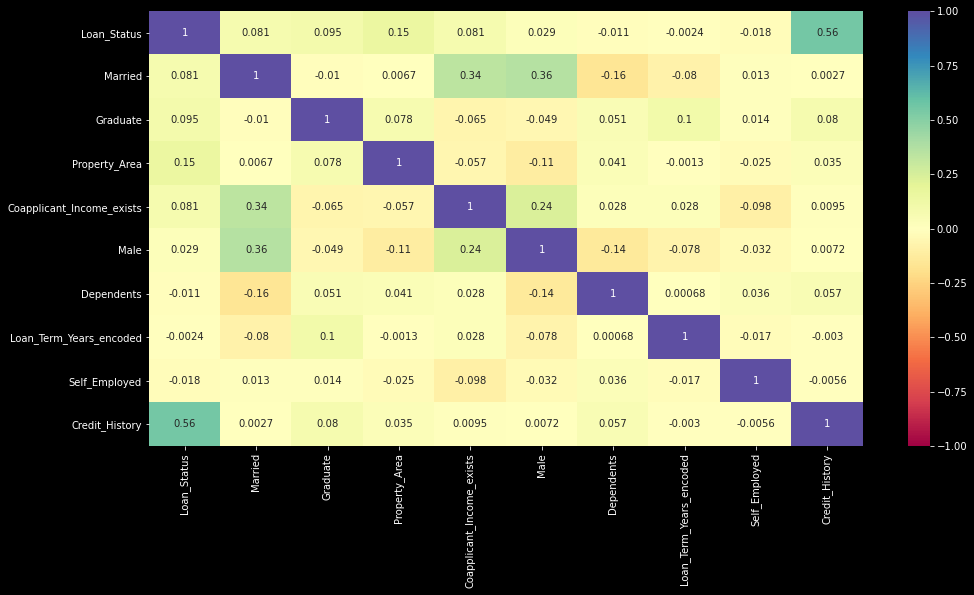

In [85]:
plt.figure(figsize=(16,8))
sns.heatmap(df_finance.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')

In [86]:
# Removing less correlated and non-linear features
feature_set_3 = df_finance_train.drop(columns=['Loan_Term_Years_encoded', 'Married', 'Male', 'Dependents']).columns.to_list()
feature_set_3

['Graduate',
 'Property_Area',
 'Applicant_Income_Category',
 'Coapplicant_Income_exists',
 'Loan_Amount',
 'Self_Employed',
 'Credit_History']

## Gaussian NaiveBayes with f2 and f3

In [87]:
acc_nb_f2, bac_nb_f2, rec_nb_f2, auc_nb_f2 = fit_algo(GNB(), x_train=df_finance_train[feature_set_2], label=label)
model_evaluation('GNB_f2', len(feature_set_2), feature_set_2, acc_nb_f2, bac_nb_f2, rec_nb_f2, auc_nb_f2)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


In [88]:
acc_nb_f3, bac_nb_f3, rec_nb_f3, auc_nb_f3 = fit_algo(GNB(), x_train=df_finance_train[feature_set_3], label=label)
model_evaluation('GNB_f3', len(feature_set_3), feature_set_3, acc_nb_f3, bac_nb_f3, rec_nb_f3, auc_nb_f3)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


## Logistic Regression with f2 and f3

In [89]:
acc_lr_f2, bac_lr_f2, rec_lr_f2, auc_lr_f2 = fit_algo(LR(random_state=23, solver='liblinear', C=0.5), df_finance_train[feature_set_2], label)
model_evaluation('LRC_f2', len(feature_set_2), feature_set_2, acc_lr_f2, bac_lr_f2, rec_lr_f2, auc_lr_f2)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


In [90]:
acc_lr_f3, bac_lr_f3, rec_lr_f3, auc_lr_f3 = fit_algo(LR(random_state=23, solver='liblinear', C=0.5), df_finance_train[feature_set_3], label)
model_evaluation('LRC_f3', len(feature_set_3), feature_set_3, acc_lr_f3, bac_lr_f3, rec_lr_f3, auc_lr_f3)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
7,LRC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


## Random Forest Classifier with f2 and f3

In [91]:
acc_rf_f2, bac_rf_f2, rec_rf_f2, auc_rf_f2 = fit_algo(RFC(random_state=23), df_finance_train[feature_set_2], label)
model_evaluation('RFC_f2', len(feature_set_2), feature_set_2, acc_rf_f2, bac_rf_f2, rec_rf_f2, auc_rf_f2)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
7,LRC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716
8,RFC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.787,0.703,0.937,0.703
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


In [92]:
acc_rf_f3, bac_rf_f3, rec_rf_f3, auc_rf_f3 = fit_algo(RFC(random_state=23), df_finance_train[feature_set_3], label)
model_evaluation('RFC_f3', len(feature_set_3), feature_set_3, acc_rf_f3, bac_rf_f3, rec_rf_f3, auc_rf_f3)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
9,RFC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.783,0.724,0.889,0.724
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
7,LRC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716
8,RFC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.787,0.703,0.937,0.703
2,RFC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.765,0.697,0.887,0.697


## Support Vector Classifier with f2 and f3

In [93]:
acc_svc_f2, bac_svc_f2, rec_svc_f2, auc_svc_f2 = fit_algo(SVC(random_state=23, kernel='linear'), df_finance_train[feature_set_2], label)
model_evaluation('SVC_f2', len(feature_set_2), feature_set_2, acc_svc_f2, bac_svc_f2, rec_svc_f2, auc_svc_f2)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
9,RFC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.783,0.724,0.889,0.724
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
7,LRC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
10,SVC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716
8,RFC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.787,0.703,0.937,0.703


In [94]:
acc_svc_f3, bac_svc_f3, rec_svc_f3, auc_svc_f3 = fit_algo(SVC(random_state=23, kernel='linear'), df_finance_train[feature_set_3], label)
model_evaluation('SVC_f3', len(feature_set_3), feature_set_3, acc_svc_f3, bac_svc_f3, rec_svc_f3, auc_svc_f3)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
9,RFC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.783,0.724,0.889,0.724
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
7,LRC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
10,SVC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.814,0.720,0.982,0.720
11,SVC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716
4,GNB_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.808,0.716,0.974,0.716


### The evaluation DataFrame is already arranged in descending order with respect to the Balanced Accuracy of various algorithms. Although, Random Forest with feature set 3 gives the best balanced accuracy and auc, it has a very low recall. Also, the difference between the second best performing algorithm(LR) and RFC in their balanced accuracy is a mere 0.001, which for a small testing set of size 367 is pretty insignificant. Therefore, we can choose Logistic Regression with feature set 2 as our predicting algorithms, tune it's hyperparamters further and see what we can do next.

In [95]:
finance_test.shape

(367, 12)

##  Hyper parameter tuning of Logistic Regression.

In [96]:
param_grid_lr = { 'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
              'class_weight': [None, 'balanced'],
              'solver': ['liblinear', 'newton-cg']
}

grid_search_lr = GridSearchCV(LR(random_state=23), param_grid=param_grid_lr, cv=10, scoring='balanced_accuracy')
grid_search_lr.fit(df_finance_train[feature_set_2], label)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=23),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
                         'class_weight': [None, 'balanced'],
                         'solver': ['liblinear', 'newton-cg']},
             scoring='balanced_accuracy')

In [97]:
grid_search_lr.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'solver': 'liblinear'}

### Now we have the best hyperparametes. Let's run the Logistic Regression algorithm with feature set 2 to see if our model has improved. 

In [98]:
acc_lr_f2_, bac_lr_f2_, rec_lr_f2_, auc_lr_f2_ = fit_algo(LR(random_state=23, C=0.1, class_weight='balanced', solver='liblinear'), df_finance_train[feature_set_2], label)
model_evaluation('LR_f2_tuned', len(feature_set_2), feature_set_2, acc_lr_f2_, bac_lr_f2_, rec_lr_f2_, auc_lr_f2_)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
12,LR_f2_tuned,7,"[Credit_History, Property_Area, Coapplicant_In...",0.789,0.732,0.889,0.732
9,RFC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.783,0.724,0.889,0.724
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
7,LRC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
10,SVC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.814,0.720,0.982,0.720
11,SVC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
0,GNB_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.808,0.716,0.974,0.716


### Although the Balanced accuracy scores for the tuned model went up, the recall score came down significantly. Therefore, let's also try to tune the hyperparameters of Random forest classifier with feature_set_3 and see if we can get an even better balanced accuracy.

In [99]:
param_grid_rfc = {'criterion': ['gini', 'entropy'],
                  'bootstrap': [True, False],
                  'class_weight': [None, 'balanced'],
                  'max_depth': [None, 10, 50, 100, 500],
                  'min_samples_split': [3,4,5,6],
}

grid_search_rfc = GridSearchCV(RFC(random_state=23), param_grid=param_grid_rfc, cv=10, scoring='balanced_accuracy')
grid_search_rfc.fit(df_finance_train[feature_set_3], label)
grid_search_rfc.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 3}

#### We have the best hyperparameters for Random Forest. Let's run the algorithm one last time. 

In [100]:
model_rfc_tuned = RFC(random_state=23, bootstrap=True, class_weight='balanced', criterion='entropy', max_depth=None, min_samples_split=3)
acc_rf_f3_, bac_rf_f3_, rec_rf_f3_, auc_rf_f3_ = fit_algo(model_rfc_tuned, df_finance_train[feature_set_3], label)
model_evaluation('RFC_f3_tuned', len(feature_set_3), feature_set_3, acc_rf_f3_, bac_rf_f3_, rec_rf_f3_, auc_rf_f3_)

,model_name,feature_count,feature_names,ACC,BAC,REC,AUC
13,RFC_f3_tuned,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.792,0.742,0.881,0.742
12,LR_f2_tuned,7,"[Credit_History, Property_Area, Coapplicant_In...",0.789,0.732,0.889,0.732
9,RFC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.783,0.724,0.889,0.724
6,LRC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.815,0.723,0.982,0.723
1,LRC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.721,0.979,0.721
3,SVC_f1,11,"[Married, Graduate, Property_Area, Applicant_I...",0.814,0.720,0.982,0.720
5,GNB_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
7,LRC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720
10,SVC_f2,7,"[Credit_History, Property_Area, Coapplicant_In...",0.814,0.720,0.982,0.720
11,SVC_f3,7,"[Graduate, Property_Area, Applicant_Income_Cat...",0.814,0.720,0.982,0.720


### Phew! Finally, we have managed to increase the balanced accuracy score but the loss in recall when compared to the gain in balanced accuracy is quite significant. Therefore, I would prefer using the Logistic Regression model with feature set 2 for making our predictions.

In [101]:
df_finance_train.Loan_Amount.value_counts()

4    117
1    116
3    109
2    109
5    107
Name: Loan_Amount, dtype: int64

# Making predictions

#### Checking the missing values in the test set.

<AxesSubplot:>

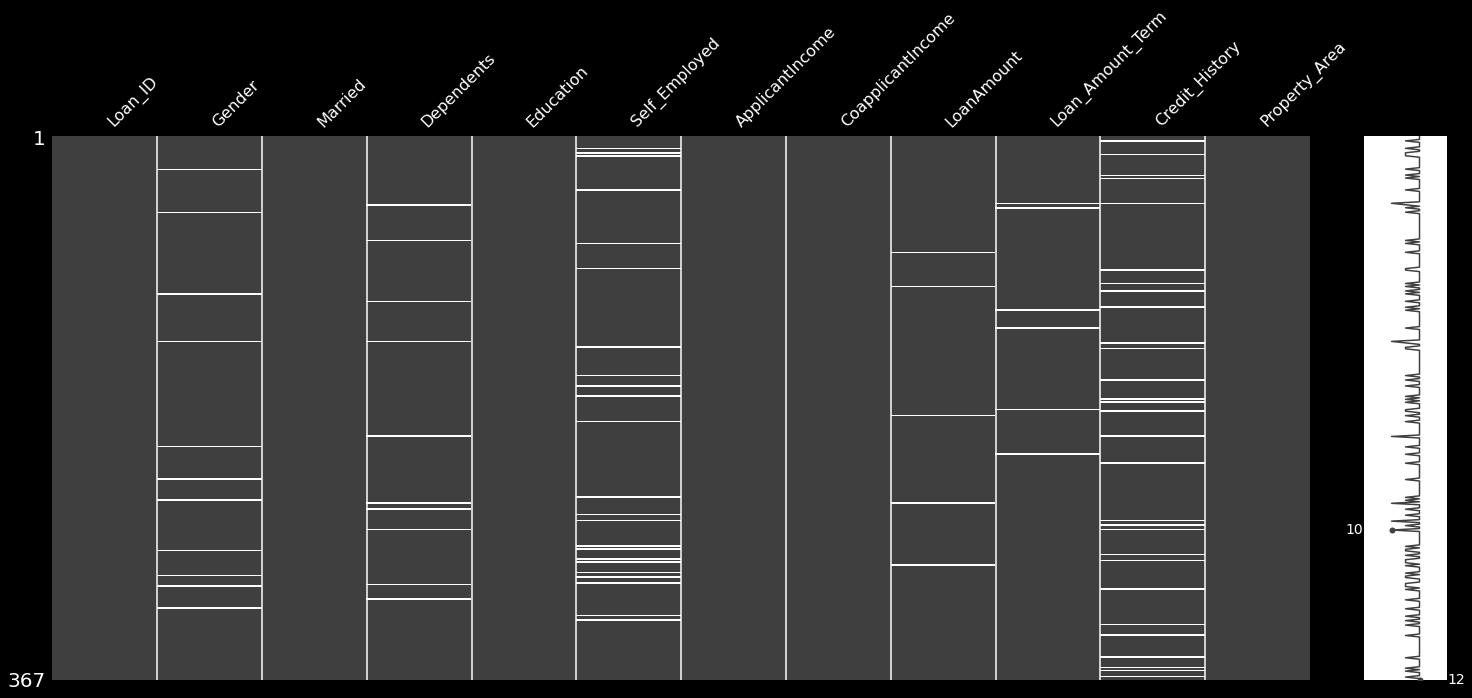

In [102]:
missingno.matrix(finance_test)

In [103]:
finance_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [104]:
# We will be using feature_set_2 to make predictions

feature_set_2

['Credit_History',
 'Property_Area',
 'Coapplicant_Income_exists',
 'Graduate',
 'Married',
 'Dependents',
 'Loan_Term_Years_encoded']

##### We need to Impute the missing values of Credit_history, Dependents, Loan_Amount_term

### 1. Imputing Dependents - using the same proportion of 0,1,2,3 as was in the training set.

In [105]:
finance_test.Dependents = finance_test.Dependents.replace('3+','3')
np.random.seed(23)
finance_test.Dependents = finance_test.Dependents.fillna(pd.Series(np.random.choice(['0', '1', '2', '3'], p=[0.58, 0.17, 0.17, 0.08], size=len(finance_test))))

### 2. Imputing Loan_Amount_Term with the top two values: 360.0 and 180.0

In [106]:
np.random.seed(23)
finance_test['Loan_Amount_Term'] = finance_test.Loan_Amount_Term.fillna(pd.Series(np.random.choice([360.0, 180.0], p=[0.84, 0.16], size=len(finance_test))))
finance_test['Loan_Term_Years'] = finance_test['Loan_Amount_Term'].apply(lambda x: x//12)

### 3. Imputing Credit_History with the same proportions of 0 and 1  as was in the training set.

In [107]:
df_finance_train.Credit_History.value_counts(dropna=False, normalize=True)

1.0    0.840502
0.0    0.159498
Name: Credit_History, dtype: float64

In [108]:
finance_test['Credit_History'] = finance_test.Credit_History.fillna(pd.Series(np.random.choice([0, 1], p=[0.16, 0.84], size=len(finance_test))))

### 4. Imputing LoanAmount with the median from the training set

In [109]:
finance_test['LoanAmount'] = finance_test.LoanAmount.fillna(finance_train.LoanAmount.median())

# We need to also Label Encode the Loan Amount but since it's not a part of feature_set_2, we will skip this

### 5. Imputing Self_Employed in the same proportions of "yes" and "no" as the training set.

In [110]:
finance_test['Self_Employed'] = finance_test.Self_Employed.fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.14, 0.86], size=len(finance_test))))

### Creating an empty DataFrame to which we can add our encoded features one by one.

In [111]:
df_finance_submit = pd.DataFrame()

#### Adding all the features present in feature_set_2 and encoding them

In [112]:
# 1. Credit History
df_finance_submit['Credit_History'] = finance_test['Credit_History']


# 2. Property Area with the same weights to properties as the training set.
df_finance_submit['Property_Area'] = finance_test.Property_Area.replace({'Semiurban': 3,
                                                                         'Urban': 2,
                                                                         'Rural': 1})


# 3. Coapplicant Income exists or not. 1 for Yes and 0 for No
df_finance_submit['Coapplicant_Income_exists'] = finance_test['CoapplicantIncome']
df_finance_submit['Coapplicant_Income_exists'] = np.where(df_finance_submit.Coapplicant_Income_exists == 0, 0, 1)


# 4. Education status.
df_finance_submit['Graduate'] = finance_test['Education'].replace({'Graduate': 1,
                                                                  'Not Graduate' : 0 })

# 5. Marriage status
df_finance_submit['Married'] = finance_test['Married'].replace({'Yes': 1,
                                                                'No': 0 })

# 6. Dependents. 
df_finance_submit['Dependents'] = finance_test['Dependents'].replace({'1': 3, '0': 2, '2': 1, '3': 0})


In [113]:
# 7. Loan_Term years after label encoding it

encode = LabelEncoder()
df_finance_submit['Loan_Term_Years_encoded'] = pd.Series(encode.fit_transform(finance_test['Loan_Term_Years']))
df_finance_submit.head()

,Credit_History,Property_Area,Coapplicant_Income_exists,Graduate,Married,Dependents,Loan_Term_Years_encoded
0,1.0,2,0,1,1,2,10
1,1.0,2,1,1,1,3,10
2,1.0,2,1,1,1,1,10
3,1.0,2,1,1,1,1,10
4,1.0,2,0,0,0,2,10


In [114]:
final_model = LR(solver='liblinear', random_state=23, C=0.5).fit(df_finance_train[feature_set_2], label)
final_predictions = final_model.predict(df_finance_submit[feature_set_2])
final_predictions[:30]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

#### Checking if the length of predictions is the same as the length of the test set

In [115]:
finance_test.shape[0] == len(final_predictions)

True

In [116]:
#Creating a DataFrame to store only the necessary columns to match the schema for the final submission.

final_submission = pd.DataFrame()

final_submission['Loan_ID'] = finance_test['Loan_ID']
final_submission['Loan_Status'] = final_predictions

final_submission.tail(10)

,Loan_ID,Loan_Status
357,LP002952,1
358,LP002954,1
359,LP002962,1
360,LP002965,1
361,LP002969,1
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1
366,LP002989,1


#### We can change the 1 to Y and 0 for N for better readability.

In [117]:
final_submission['Loan_Status'] = final_submission.Loan_Status.replace({1: 'Y',
                                                                        0: 'N'})
final_submission.tail(10)

,Loan_ID,Loan_Status
357,LP002952,Y
358,LP002954,Y
359,LP002962,Y
360,LP002965,Y
361,LP002969,Y
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


### Creating a csv file for final submission.

In [119]:
final_submission.to_csv('loan_predict_submission_.csv', index=False)